This notebook contains all the populaton level correlation analyses for Nurminen, Bijanzadeh & Angelucci 2022.

In [1]:
# Import packages, load pre-computed data and do pre-processing
import sys
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sts

sys.path.append('C:/Users/lonurmin/Desktop/code/Analysis/')
import data_analysislib as dalib
from scipy.optimize import basinhopping

def cost_fano(params,xdata,ydata):
    Rhat = dalib.doubleROG(xdata,*params)
    err  = np.sum(np.power(Rhat - ydata,2))
    return err

def cost_response(params,xdata,ydata):
    Rhat = dalib.ROG(xdata,*params)
    err  = np.sum(np.power(Rhat - ydata,2))
    return err

FIG_dir = 'C:/Users/lonurmin/Desktop/CorrelatedVariability/results/paper_v9/IntermediateFigures/'
F_dir   = 'C:/Users/lonurmin/Desktop/CorrelatedVariability/results/paper_v9/MK-MU/'
params_df = pd.read_csv(F_dir + 'extracted_correlation_params.csv')
corrBSL = np.nanmean(params_df['gm_fit_correlation_BSL'].values)
params_df['utype'] = ['multi'] * len(params_df.index)

paramsas = params_df

# correlations for all pairs
with open(F_dir + 'correlations_all.pkl','rb') as f:
    correlations_all = pkl.load(f)

with open(F_dir + 'means_all.pkl','rb') as f:
    means_all = pkl.load(f)    
    
diams_all  = np.array(list(correlations_all.keys()))
rSC_mn_all = np.zeros(diams_all.shape[0])
rSC_SE_all = np.zeros(diams_all.shape[0])
gm_mn_all  = np.zeros(diams_all.shape[0])
gm_SE_all  = np.zeros(diams_all.shape[0])

for d in range(diams_all.shape[0]):
    rSC_mn_all[d] = np.mean(correlations_all[diams_all[d]])
    rSC_SE_all[d] = np.std(correlations_all[diams_all[d]]) / np.sqrt(correlations_all[diams_all[d]].shape[0])

    gm_mn_all[d] = np.mean(means_all[diams_all[d]])
    gm_SE_all[d] = np.std(means_all[diams_all[d]]) / np.sqrt(means_all[diams_all[d]].shape[0])
    
    
# correlations for supragranular layer units
with open(F_dir + 'correlations_SGSG.pkl','rb') as f:
    correlations_SGSG = pkl.load(f)
with open(F_dir + 'means_SGSG.pkl','rb') as f:
    means_SGSG = pkl.load(f)
    
diams_SGSG  = np.array(list(correlations_SGSG.keys()))
rSC_mn_SGSG = np.zeros(diams_SGSG.shape[0])
rSC_SE_SGSG = np.zeros(diams_SGSG.shape[0])
gm_mn_SGSG = np.zeros(diams_SGSG.shape[0])
gm_SE_SGSG = np.zeros(diams_SGSG.shape[0])

for d in range(diams_SGSG.shape[0]):
    rSC_mn_SGSG[d] = np.mean(correlations_SGSG[diams_SGSG[d]])
    rSC_SE_SGSG[d] = np.std(correlations_SGSG[diams_SGSG[d]]) / np.sqrt(correlations_SGSG[diams_SGSG[d]].shape[0])

    gm_mn_SGSG[d] = np.mean(means_SGSG[diams_SGSG[d]])
    gm_SE_SGSG[d] = np.std(means_SGSG[diams_SGSG[d]]) / np.sqrt(means_SGSG[diams_SGSG[d]].shape[0])
    
# correlations for infragranular units
with open(F_dir + 'correlations_IGIG.pkl','rb') as f:
    correlations_IGIG = pkl.load(f)
# correlations for narrow spiking units
with open(F_dir + 'means_IGIG.pkl','rb') as f:
    means_IGIG = pkl.load(f)
    
diams_IGIG  = np.array(list(correlations_IGIG.keys()))
rSC_mn_IGIG = np.zeros(diams_IGIG.shape[0])
rSC_SE_IGIG = np.zeros(diams_IGIG.shape[0])
gm_mn_IGIG = np.zeros(diams_IGIG.shape[0])
gm_SE_IGIG = np.zeros(diams_IGIG.shape[0])
for d in range(diams_IGIG.shape[0]):
    rSC_mn_IGIG[d] = np.mean(correlations_IGIG[diams_IGIG[d]])
    rSC_SE_IGIG[d] = np.std(correlations_IGIG[diams_IGIG[d]]) / np.sqrt(correlations_IGIG[diams_IGIG[d]].shape[0])

    gm_mn_IGIG[d] = np.mean(means_IGIG[diams_IGIG[d]])
    gm_SE_IGIG[d] = np.std(means_IGIG[diams_IGIG[d]]) / np.sqrt(means_IGIG[diams_IGIG[d]].shape[0])

# correlations for granular units
with open(F_dir + 'correlations_GG.pkl','rb') as f:
    correlations_GG = pkl.load(f)
# correlations for narrow spiking units
with open(F_dir + 'means_GG.pkl','rb') as f:
    means_GG = pkl.load(f)
    
diams_GG  = np.array(list(correlations_GG.keys()))
rSC_mn_GG = np.zeros(diams_GG.shape[0])
rSC_SE_GG = np.zeros(diams_GG.shape[0])
gm_mn_GG = np.zeros(diams_GG.shape[0])
gm_SE_GG = np.zeros(diams_GG.shape[0])
for d in range(diams_GG.shape[0]):
    rSC_mn_GG[d] = np.mean(correlations_GG[diams_GG[d]])
    rSC_SE_GG[d] = np.std(correlations_GG[diams_GG[d]]) / np.sqrt(correlations_GG[diams_GG[d]].shape[0])

    gm_mn_GG[d] = np.mean(means_GG[diams_GG[d]])
    gm_SE_GG[d] = np.std(means_GG[diams_GG[d]]) / np.sqrt(means_GG[diams_GG[d]].shape[0])


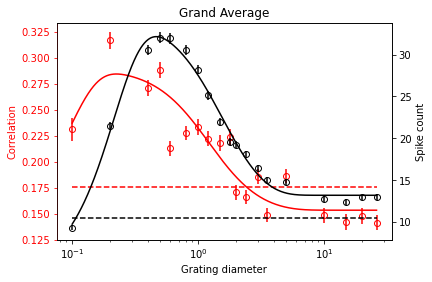

In [2]:
# plot the average correlation and mean firing rate for all units
plt.figure(num='Grand Average',frameon=False)
BSL = params_df['baseline_u1'] * params_df['baseline_u2']
params_df.insert(0,'spk_baseline_gm',BSL)
params_df['spk_baseline_gm'] = params_df['spk_baseline_gm'].apply(lambda x: np.sqrt(x))

ax2 = plt.subplot(1,1,1)
ax2.title.set_text('Grand Average')
args = (diams_all,rSC_mn_all)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_all[0]),np.log10(diams_all[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)
args = (diams_all,gm_mn_all)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_all[0]),np.log10(diams_all[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

corrBSL_all = params_df['gm_fit_correlation_BSL'].mean()
ax2b = ax2.twinx()
ax2.errorbar(diams_all, rSC_mn_all, yerr=rSC_SE_all, fmt='ro', markerfacecolor='None')
ax2b.errorbar(diams_all, gm_mn_all, yerr=gm_SE_all, fmt='ko', markerfacecolor='None')
ax2.plot(diams_tight,Chat, 'r-')
ax2b.plot(diams_tight,Rhat, 'k-')
ax2.plot([diams_all[0], diams_all[-1]], [corrBSL_all, corrBSL_all], 'r--')
ax2.set_xscale('log')
#ax2.set_yticks([0, 0.15, 0.3, 0.45])
ax2.set_xticks([0.1, 1, 10])
ax2.spines['left'].set_color('red')
ax2.tick_params(axis='y',colors='red')
ax2.yaxis.label.set_color('red')
ax2b.plot([diams_all[0], diams_all[-1]], [params_df['spk_baseline_gm'].mean(), params_df['spk_baseline_gm'].mean()], 'k--')

ax2.set_ylabel('Correlation')
ax2b.set_ylabel('Spike count')
ax2.set_xlabel('Grating diameter')

plt.savefig(FIG_dir + 'F5_A-Correlations-Grand_Average.svg')

The figure above plot the average correlation and firing-rate for all the 82 multi-units we recorded for this study. Black symbols show correlations and red symbols show firing-rate. The smooth curvers show a function fitted to the data. The dashed line represents baseline correlation.

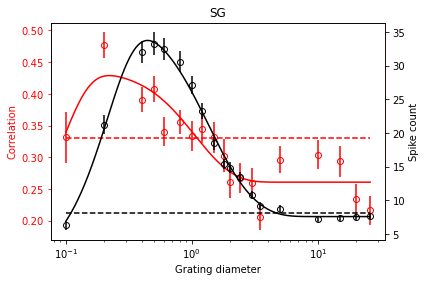

In [3]:
# plot the average correlation and mean firing rate for supragranular units
plt.figure(num='SG')
ax2 = plt.subplot(1,1,1)
ax2.title.set_text('SG')
args = (diams_SGSG,rSC_mn_SGSG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_SGSG[0]),np.log10(diams_SGSG[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)

args = (diams_SGSG,gm_mn_SGSG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_SGSG[0]),np.log10(diams_SGSG[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

corrBSL_SGSG = params_df.groupby('layer_type')['gm_fit_correlation_BSL'].mean()['SGSG']
ax2b = ax2.twinx()
ax2.errorbar(diams_SGSG, rSC_mn_SGSG, yerr=rSC_SE_SGSG, fmt='ro', markerfacecolor='None')
ax2b.errorbar(diams_SGSG, gm_mn_SGSG, yerr=gm_SE_SGSG, fmt='ko', markerfacecolor='None')
ax2.plot(diams_tight,Chat, 'r-')
ax2b.plot(diams_tight,Rhat, 'k-')
ax2.plot([diams_SGSG[0], diams_SGSG[-1]], [corrBSL_SGSG, corrBSL_SGSG], 'r--')
ax2.set_xscale('log')
#ax2.set_yticks([0, 0.15, 0.3, 0.45])
ax2.set_xticks([0.1, 1, 10])
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y',colors='red')
ax2.yaxis.label.set_color('red')

ax2b.plot([diams_all[0], diams_all[-1]], [params_df.groupby('layer_type')['spk_baseline_gm'].mean()['SGSG'], params_df.groupby('layer_type')['spk_baseline_gm'].mean()['SGSG']], 'k--')

ax2.set_ylabel('Correlation')
ax2b.set_ylabel('Spike count')
ax2.set_xlabel('Grating diameter')

plt.savefig(FIG_dir + 'F5B-Correlations-Average-SGunits.svg')

The figure above plot the average correlation and firing-rate for multi-units in supragranular layers of V1. Figure conventions as above.

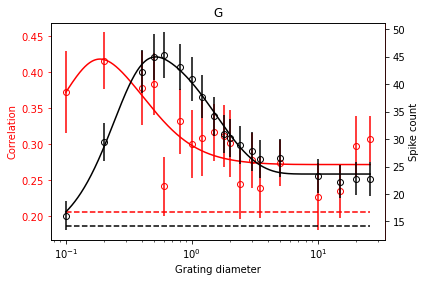

In [4]:
# plot the average correlation and mean firing rate for granular layer units
plt.figure(num='G')
corrBSL_GG = params_df.groupby('layer_type')['gm_fit_correlation_BSL'].mean()['GG']
ax4 = plt.subplot(1,1,1)
ax4.title.set_text('G')
ax4b = ax4.twinx()
args = (diams_GG,rSC_mn_GG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_GG[0]),np.log10(diams_GG[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)

args = (diams_GG,gm_mn_GG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_GG[0]),np.log10(diams_GG[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

ax4.errorbar(diams_GG, rSC_mn_GG, yerr=rSC_SE_GG, fmt='ro', markerfacecolor='None')
ax4b.errorbar(diams_GG, gm_mn_GG, yerr=gm_SE_GG, fmt='ko', markerfacecolor='None')
ax4.plot(diams_tight,Chat, 'r-')
ax4b.plot(diams_tight,Rhat, 'k-')
ax4.plot([diams_GG[0], diams_GG[-1]], [corrBSL_GG, corrBSL_GG], 'r--')
ax4.set_xscale('log')
#ax4.set_yticks([0, 0.15, 0.3, 0.45])
ax4.set_xticks([0.1, 1, 10])
ax4.spines['right'].set_color('red')
ax4.tick_params(axis='y',colors='red')
ax4.yaxis.label.set_color('red')
ax4b.plot([diams_all[0], diams_all[-1]], [params_df.groupby('layer_type')['spk_baseline_gm'].mean()['GG'], params_df.groupby('layer_type')['spk_baseline_gm'].mean()['GG']], 'k--')

ax4.set_ylabel('Correlation')
ax4b.set_ylabel('Spike count')
ax4.set_xlabel('Grating diameter')

plt.savefig(FIG_dir + 'F5C-Correlations-Average-Gunits.svg')

The figure above plot the average correlation and firing-rate for multi-units in granular layers of V1. Figure conventions as above.

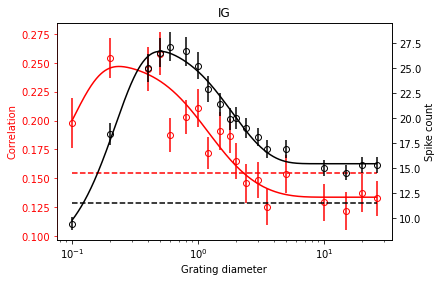

In [5]:
# plot the average correlation and mean firing rate for infragranular units
plt.figure(num='IG')
corrBSL_IGIG = params_df.groupby('layer_type')['gm_fit_correlation_BSL'].mean()['IGIG']
ax3 = plt.subplot(1,1,1)
ax3.title.set_text('IG')
ax3b = ax3.twinx()
args = (diams_IGIG,rSC_mn_IGIG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_IGIG[0]),np.log10(diams_IGIG[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)

args = (diams_IGIG,gm_mn_IGIG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_IGIG[0]),np.log10(diams_IGIG[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

ax3.errorbar(diams_IGIG, rSC_mn_IGIG, yerr=rSC_SE_IGIG, fmt='ro', markerfacecolor='None')
ax3b.errorbar(diams_IGIG, gm_mn_IGIG, yerr=gm_SE_IGIG, fmt='ko', markerfacecolor='None')
ax3.plot(diams_tight,Chat, 'r-')
ax3b.plot(diams_tight,Rhat, 'k-')
ax3.plot([diams_IGIG[0], diams_IGIG[-1]], [corrBSL_IGIG, corrBSL_IGIG], 'r--')
ax3.set_xscale('log')
ax3.set_ylabel('rSC')
#ax3.set_yticks([0, 0.15, 0.3, 0.45])
ax3.set_xticks([0.1, 1, 10])
ax3b.set_ylabel('Spike-count')
ax3b.set_xlabel('Grating diameter')
ax3.spines['left'].set_color('red')
ax3.tick_params(axis='y',colors='red')
ax3.yaxis.label.set_color('red')

ax3b.plot([diams_all[0], diams_all[-1]], [params_df.groupby('layer_type')['spk_baseline_gm'].mean()['IGIG'], params_df.groupby('layer_type')['spk_baseline_gm'].mean()['IGIG']], 'k--')

ax3.set_ylabel('Correlation')
ax3b.set_ylabel('Spike count')
ax3.set_xlabel('Grating diameter')

plt.savefig(FIG_dir + 'F5D-Correlations-Average-IGunits.svg')

The figure above plots the average correlation and firing-rate for infragranular layer units.

layer_type
GG        (-2.2473160378593784, 0.032771589918260485)
IGIG      (-2.7829921556366406, 0.005850042581745143)
SGSG      (-2.2806438331166374, 0.023953681155309308)
mixed    (-8.397194047148409, 1.9234451351716878e-16)
dtype: object

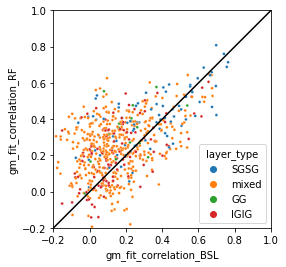

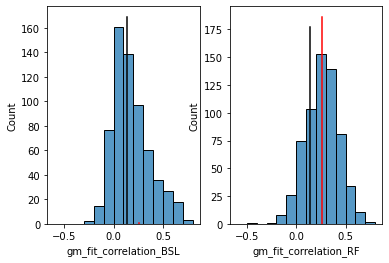

In [6]:
# plot correlation measured at the RF vs baseline
plt.figure(num='baseline vs RF')
ax = plt.subplot(111)
sns.scatterplot(x='gm_fit_correlation_BSL',y='gm_fit_correlation_RF',hue='layer_type',data=params_df,ax=ax, s=8)
ax.plot([-1,1],[-1,1],'k-')
ax.set_xlim(-0.2,1)
ax.set_ylim(-0.2,1)
ax.set_aspect('equal')
plt.savefig(FIG_dir + 'F5F-Correlations-baseline-RF.svg')

# plot correlation histograms at RF and baseline
plt.figure(num='histograms')
ax = plt.subplot(1,2,1)
sns.histplot(x='gm_fit_correlation_BSL',data=params_df,ax=ax,bins=np.arange(-0.6,0.9,0.1))
ax.plot([params_df['gm_fit_correlation_BSL'].median(),params_df['gm_fit_correlation_BSL'].median()],[0,ax.get_ylim()[1]],'k-')
ax.plot([params_df['gm_fit_correlation_RF'].median(),params_df['gm_fit_correlation_RF'].median()],[0,ax2.get_ylim()[1]],'r-')
ax2 = plt.subplot(1,2,2)
sns.histplot(x='gm_fit_correlation_RF',data=params_df,ax=ax2,bins=np.arange(-0.6,0.9,0.1))
ax2.plot([params_df['gm_fit_correlation_BSL'].median(),params_df['gm_fit_correlation_BSL'].median()],[0,ax.get_ylim()[1]],'k-')
ax2.plot([params_df['gm_fit_correlation_RF'].median(),params_df['gm_fit_correlation_RF'].median()],[0,ax2.get_ylim()[1]],'r-')

plt.savefig(FIG_dir + 'F5G-Correlations-histograms-BSL-RF.svg')

params_df.groupby('layer_type').apply(lambda x: sts.ttest_ind(x['gm_fit_correlation_BSL'],x['gm_fit_correlation_RF'],equal_var=False,nan_policy='omit'))

Correlations at the RF vs baseline. 

layer_type
GG            (0.994153347403036, 0.3287539051513366)
IGIG       (6.094701029823563, 5.308407488993655e-09)
SGSG       (6.061765232826638, 9.127727771152296e-09)
mixed    (10.743264660581275, 2.7064405621883475e-25)
dtype: object

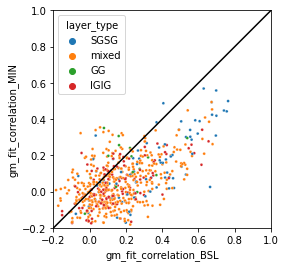

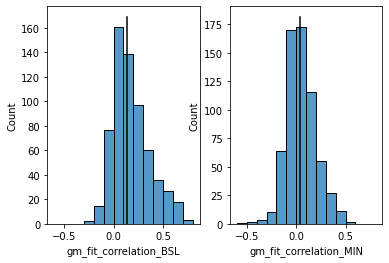

In [7]:
# plot correlation baseline vs min + stats
plt.figure(num='baseline vs MIN')
ax = plt.subplot(111)
sns.scatterplot(x='gm_fit_correlation_BSL',y='gm_fit_correlation_MIN',hue='layer_type',data=params_df,ax=ax, s=8)
ax.plot([-1,1],[-1,1],'k-')
ax.set_xlim(-0.2,1)
ax.set_ylim(-0.2,1)
ax.set_aspect('equal')
plt.savefig(FIG_dir + 'F5H-Correlations-baseline-RF.svg')

plt.figure(num='quenching hist')
ax = plt.subplot(1,2,1)
sns.histplot(x='gm_fit_correlation_BSL',data=params_df,ax=ax,bins=np.arange(-0.6,0.9,0.1))
ax.plot([params_df['gm_fit_correlation_BSL'].median(),params_df['gm_fit_correlation_BSL'].median()],[0,ax.get_ylim()[1]],'k-')
ax2 = plt.subplot(1,2,2)
sns.histplot(x='gm_fit_correlation_MIN',data=params_df,ax=ax2,bins=np.arange(-0.6,0.9,0.1))
ax2.plot([params_df['gm_fit_correlation_MIN'].median(),params_df['gm_fit_correlation_MIN'].median()],[0,ax2.get_ylim()[1]],'k-')
plt.savefig(FIG_dir + 'F5I-Correlations-histograms-BSL-RF.svg')

params_df.groupby('layer_type').apply(lambda x: sts.ttest_ind(x['gm_fit_correlation_BSL'],x['gm_fit_correlation_MIN'],equal_var=False,nan_policy='omit'))

C:\Users\lonurmin\Miniconda3\envs\danalysis\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\lonurmin\Miniconda3\envs\danalysis\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


layer_type
GG          (-0.5591969292260225, 0.5804920325745029)
IGIG      (-4.266958214248138, 2.947917257005977e-05)
SGSG     (-6.465576238392651, 1.1555895168399451e-09)
mixed     (-12.240280288037907, 8.00523707293377e-32)
dtype: object

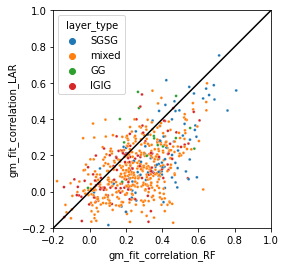

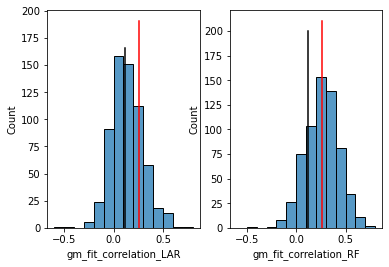

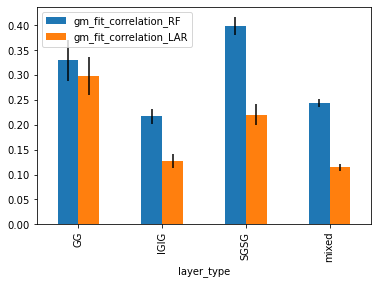

In [8]:
# plot correlation RF vs LAR + stats
plt.figure(num='RF vs LAR')
ax = plt.subplot(111)
sns.scatterplot(x='gm_fit_correlation_RF',y='gm_fit_correlation_LAR',hue='layer_type',data=params_df,ax=ax, s=8)
ax.plot([-1,1],[-1,1],'k-')
ax.set_xlim(-0.2,1)
ax.set_ylim(-0.2,1)
ax.set_aspect('equal')
plt.savefig(FIG_dir + 'F5I-Correlations-RF-LAR.svg')

plt.figure(num='suppression hist')
ax = plt.subplot(1,2,1)
sns.histplot(x='gm_fit_correlation_LAR',data=params_df,ax=ax,bins=np.arange(-0.6,0.9,0.1))
ax.plot([params_df['gm_fit_correlation_LAR'].median(),params_df['gm_fit_correlation_LAR'].median()],[0,ax.get_ylim()[1]],'k-')
ax.plot([params_df['gm_fit_correlation_RF'].median(),params_df['gm_fit_correlation_RF'].median()],[0,ax2.get_ylim()[1]],'r-')
ax2 = plt.subplot(1,2,2)
sns.histplot(x='gm_fit_correlation_RF',data=params_df,ax=ax2,bins=np.arange(-0.6,0.9,0.1))
ax2.plot([params_df['gm_fit_correlation_LAR'].median(),params_df['gm_fit_correlation_LAR'].median()],[0,ax.get_ylim()[1]],'k-')
ax2.plot([params_df['gm_fit_correlation_RF'].median(),params_df['gm_fit_correlation_RF'].median()],[0,ax2.get_ylim()[1]],'r-')
plt.savefig(FIG_dir + 'F5J-Correlations-histograms-LAR-RF.svg')

plt.figure(num='RF vs LAR bar')
ax = plt.subplot(111)
SEM = params_df.groupby('layer_type')['gm_fit_correlation_RF','gm_fit_correlation_LAR'].sem()
params_df.groupby('layer_type')['gm_fit_correlation_RF','gm_fit_correlation_LAR'].mean().plot(kind='bar',ax=ax,yerr=SEM)
plt.savefig(FIG_dir + 'F5K-Correlations-bar-LAR-RF.svg')

params_df.groupby('layer_type').apply(lambda x: sts.ttest_ind(x['gm_fit_correlation_LAR'],x['gm_fit_correlation_RF'],equal_var=False,nan_policy='omit'))

layer_type
GG          (1.7386531744874236, 0.09309683504356367)
IGIG        (-1.324589202733482, 0.18668723876054427)
SGSG      (-3.456327011224609, 0.0006977413308887327)
mixed    (-3.2079372221748863, 0.0013879697831732016)
dtype: object

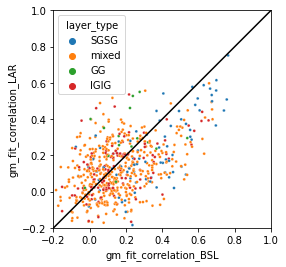

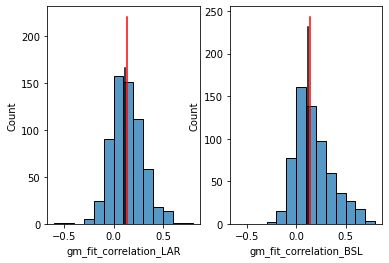

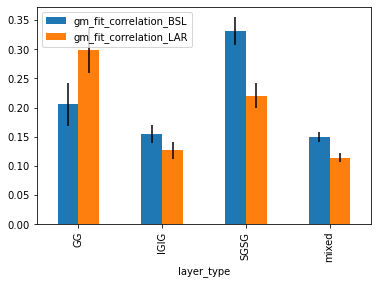

In [9]:
# plot correlation RF vs LAR + stats
plt.figure(num='BSL vs LAR')
ax = plt.subplot(111)
sns.scatterplot(x='gm_fit_correlation_BSL',y='gm_fit_correlation_LAR',hue='layer_type',data=params_df,ax=ax, s=8)
ax.plot([-1,1],[-1,1],'k-')
ax.set_xlim(-0.2,1)
ax.set_ylim(-0.2,1)
ax.set_aspect('equal')
plt.savefig(FIG_dir + 'F5L-Correlations-BSL-LAR.svg')

plt.figure(num='quench hist')
ax = plt.subplot(1,2,1)
sns.histplot(x='gm_fit_correlation_LAR',data=params_df,ax=ax,bins=np.arange(-0.6,0.9,0.1))
ax.plot([params_df['gm_fit_correlation_LAR'].median(),params_df['gm_fit_correlation_LAR'].median()],[0,ax.get_ylim()[1]],'k-')
ax.plot([params_df['gm_fit_correlation_BSL'].median(),params_df['gm_fit_correlation_BSL'].median()],[0,ax2.get_ylim()[1]],'r-')
ax2 = plt.subplot(1,2,2)
sns.histplot(x='gm_fit_correlation_BSL',data=params_df,ax=ax2,bins=np.arange(-0.6,0.9,0.1))
ax2.plot([params_df['gm_fit_correlation_LAR'].median(),params_df['gm_fit_correlation_LAR'].median()],[0,ax.get_ylim()[1]],'k-')
ax2.plot([params_df['gm_fit_correlation_BSL'].median(),params_df['gm_fit_correlation_BSL'].median()],[0,ax2.get_ylim()[1]],'r-')
plt.savefig(FIG_dir + 'F5M-Correlations-histograms-LAR-BSL.svg')

plt.figure(num='suppression bar')
SEM = params_df.groupby('layer_type')[['gm_fit_correlation_BSL','gm_fit_correlation_LAR']].sem()
ax = plt.subplot(1,1,1)
params_df.groupby('layer_type')[['gm_fit_correlation_BSL','gm_fit_correlation_LAR']].mean().plot(ax=ax,kind='bar',yerr=SEM)
plt.savefig(FIG_dir + 'F5N-Correlations-bar-BSL-LAR.svg')

params_df.groupby('layer_type').apply(lambda x: sts.ttest_ind(x['gm_fit_correlation_LAR'],x['gm_fit_correlation_BSL'],equal_var=False,nan_policy='omit'))

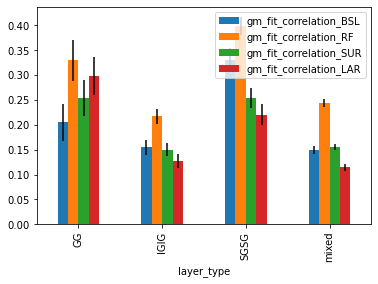

In [10]:
plt.figure(23)
SEM = params_df.groupby('layer_type')[['gm_fit_correlation_BSL','gm_fit_correlation_RF','gm_fit_correlation_SUR','gm_fit_correlation_LAR']].sem()
ax = plt.subplot(1,1,1)
params_df.groupby('layer_type')[['gm_fit_correlation_BSL','gm_fit_correlation_RF','gm_fit_correlation_SUR','gm_fit_correlation_LAR']].mean().plot(ax=ax,kind='bar',yerr=SEM)
plt.savefig(FIG_dir + 'F5O-Correlations-bar-BSL-RF-SUR-LAR.svg')

In [11]:
Y = params_df['gm_fit_RF'] - params_df['gm_fit_correlation_MAX_diam']

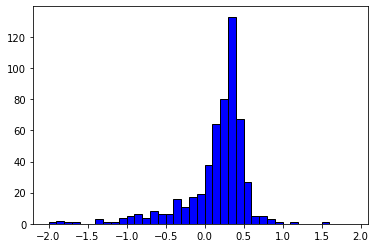

In [12]:
plt.hist(Y,bins=np.arange(-2,2,0.1),fc='blue',edgecolor='k')
plt.savefig(FIG_dir + 'RF-vs-MIN-correlation-diameter.svg')

<AxesSubplot:xlabel='layer_type'>

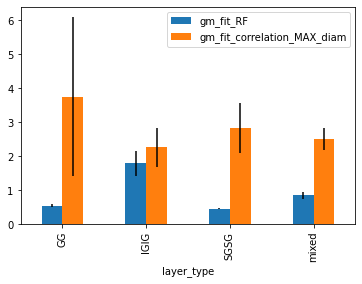

In [20]:
SEM = params_df.groupby('layer_type')[['gm_fit_RF','gm_fit_correlation_MAX_diam']].sem()
params_df.groupby('layer_type')[['gm_fit_RF','gm_fit_correlation_MAX_diam']].mean().plot(kind='bar',yerr=SEM)

<AxesSubplot:xlabel='layer_type'>

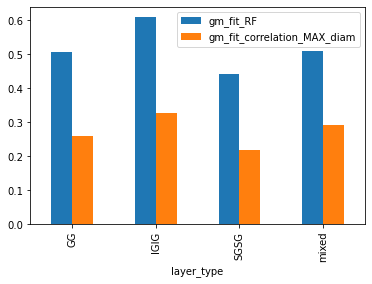

In [22]:
params_df.groupby('layer_type')[['gm_fit_RF','gm_fit_correlation_MAX_diam']].median().plot(kind='bar')

In [23]:
n_boots = 10000
RF_median_boot_SG = np.nan * np.ones(n_boots)
C_median_boot_SG = np.nan * np.ones(n_boots)
RF_median_boot_G = np.nan * np.ones(n_boots)
C_median_boot_G = np.nan * np.ones(n_boots)
RF_median_boot_IG = np.nan * np.ones(n_boots)
C_median_boot_IG = np.nan * np.ones(n_boots)

SG = params_df.query('layer_type == "SGSG"')
G = params_df.query('layer_type == "GG"')
IG = params_df.query('layer_type == "IGIG"')

for i in range(n_boots):
    idx = np.random.randint(0,len(SG),len(SG))
    RF_median_boot_SG[i] = SG.iloc[idx]['gm_fit_RF'].median()
    C_median_boot_SG[i]  = SG.iloc[idx]['gm_fit_correlation_MAX_diam'].median()
    idx = np.random.randint(0,len(G),len(G))
    RF_median_boot_G[i] = G.iloc[idx]['gm_fit_RF'].median()
    C_median_boot_G[i]  = G.iloc[idx]['gm_fit_correlation_MAX_diam'].median()
    idx = np.random.randint(0,len(IG),len(IG))
    RF_median_boot_IG[i] = IG.iloc[idx]['gm_fit_RF'].median()
    C_median_boot_IG[i]  = IG.iloc[idx]['gm_fit_correlation_MAX_diam'].median()


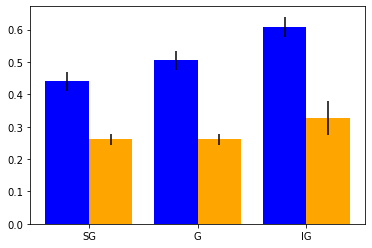

In [32]:
ax = plt.subplot(1,1,1)
ax.bar([0.75,1.25],[SG['gm_fit_RF'].median(),G['gm_fit_correlation_MAX_diam'].median()],yerr=[np.nanstd(RF_median_boot_SG),np.nanstd(C_median_boot_SG)],color=['blue','orange'],ecolor='k',width=0.5,align='center')
ax.bar(np.array([1.75,2.25])+0.25,[G['gm_fit_RF'].median(),G['gm_fit_correlation_MAX_diam'].median()],yerr=[np.nanstd(RF_median_boot_SG),np.nanstd(C_median_boot_SG)],color=['blue','orange'],ecolor='k',width=0.5,align='center')
ax.bar(np.array([2.75,3.25])+2*0.25,[IG['gm_fit_RF'].median(),IG['gm_fit_correlation_MAX_diam'].median()],yerr=[np.nanstd(RF_median_boot_IG),np.nanstd(C_median_boot_IG)],color=['blue','orange'],ecolor='k',width=0.5,align='center')
ax.set_xticks([1,2.25,3.5])
ax.set_xticklabels(['SG','G','IG'])
plt.savefig(FIG_dir + 'F5Q-correlation-MAX-diam-VS-RF.svg')